In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


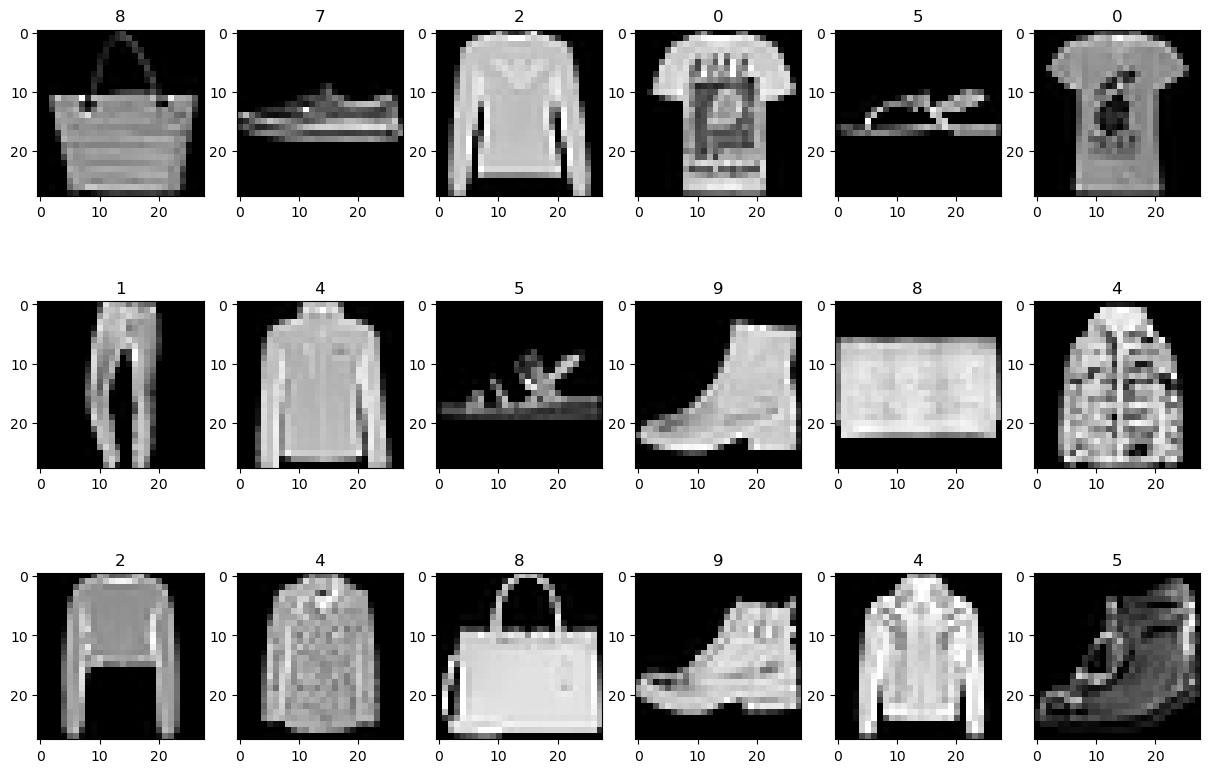

In [5]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

In [6]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [7]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

2024-03-24 18:18:39.450357: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8137 - loss: 0.5645 - val_accuracy: 0.8812 - val_loss: 0.3278
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9035 - loss: 0.2728 - val_accuracy: 0.8888 - val_loss: 0.3055
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9192 - loss: 0.2283 - val_accuracy: 0.8941 - val_loss: 0.3063
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9306 - loss: 0.1959 - val_accuracy: 0.8950 - val_loss: 0.3159
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9394 - loss: 0.1701 - val_accuracy: 0.8961 - val_loss: 0.3259
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9466 - loss: 0.1502 - val_accuracy: 0.8958 - val_loss: 0.3546
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9523 - loss: 0.1317 - val_accuracy: 0.8933 - val_loss: 0.3914
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9588 - loss: 0.1167 - 

Train Acc      0.9917333126068115
Validation Acc 0.8812000155448914


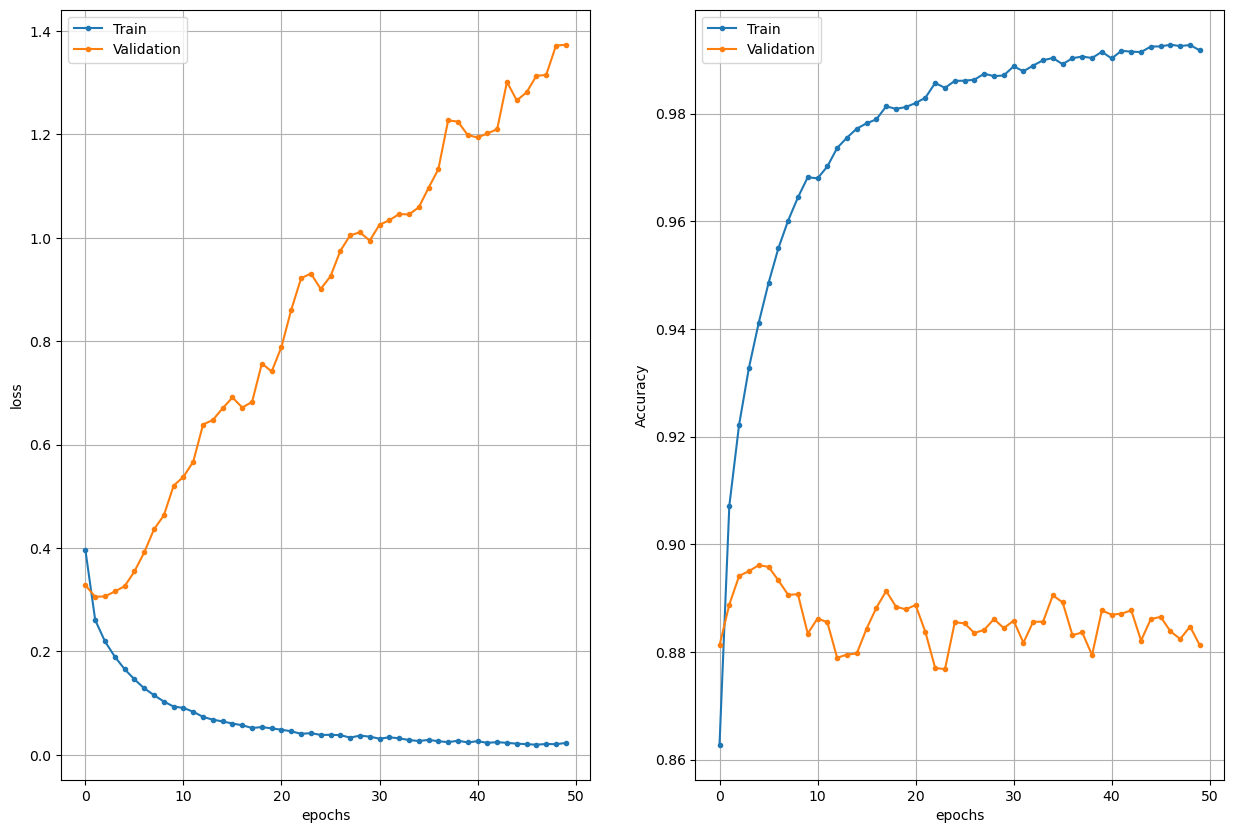

In [9]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

In [307]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


In [308]:
from sklearn.utils import shuffle

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break
            
            for idx_aug in range(batch_size):
                x_[idx_aug, ...] = np.fliplr(x_[idx_aug, ...])

            yield x_, y_

In [309]:
# Normalize pixel values to the range [0, 1]
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Ensure y_train and y_test are numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Shuffle the training data (optional but recommended)
x_train, y_train = shuffle(x_train, y_train)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.01, random_state=42)

# Confirm the shapes of the data arrays
print('train set:', x_train.shape)
print('val_train set:', x_val.shape)
print('test set:', x_test.shape)


train set: (59400, 28, 28)
val_train set: (600, 28, 28)
test set: (10000, 28, 28)


In [310]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)

net = Dropout(0.1)(net)

net = Flatten()(net)
net = Dense(128)(net)
net = Dropout(0.85)(net)
outputs = Dense(10, activation="sigmoid")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_59 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_59 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [311]:
epochs = 50
batch_size = 128
train_generator = datagen(x_train, y_train, batch_size)
steps_per_epoch = len(y_train) // batch_size

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_generator, steps_per_epoch = steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/50


464/464 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7109 - loss: 0.9303 - val_accuracy: 0.6023 - val_loss: 2.7136
Epoch 2/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7819 - loss: 0.7160 - val_accuracy: 0.8751 - val_loss: 0.3564
Epoch 3/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8303 - loss: 0.5139 - val_accuracy: 0.7913 - val_loss: 0.5485
Epoch 4/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8502 - loss: 0.4504 - val_accuracy: 0.8831 - val_loss: 0.3256
Epoch 5/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8638 - loss: 0.4107 - val_accuracy: 0.8667 - val_loss: 0.3765
Epoch 6/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8665 - loss: 0.3954 - val_accuracy: 0.8907 - val_loss: 0.3071
Epoch 7/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8772 - loss: 0.3670 - val_accuracy: 0.8764 - val_loss: 0.3538
Epoch 8/50
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8770 - loss: 0.3655 - val_accuracy: 0.89

Train Acc      0.9270609021186829
Validation Acc 0.911899983882904


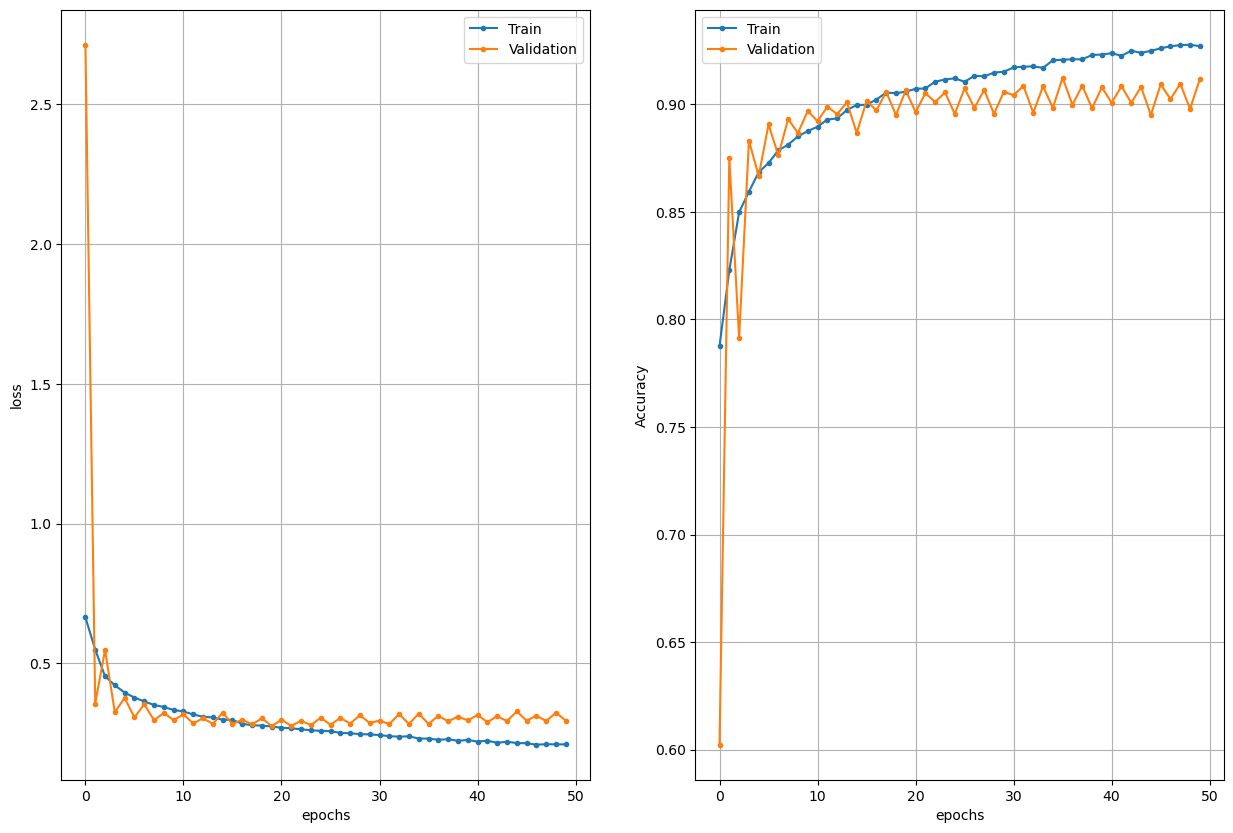

In [312]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)